- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- 
Anda diperbolehkan melakukan eksplorasi terhadap,-- 

Metode pra pengolahan

Pemilihan fitur

Arsitektur ANN

Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow. SAMPAI ARSITEKTUR ANN

### Import library

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from tensorflow.keras.utils import to_categorical

### Load dan split data

Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [48]:
data = np.load('mnist.npz')

In [43]:
data

NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test

In [50]:
X_test = data['x_test']
X_train = data['x_train']
y_test = data['y_test']
y_train = data['y_train']

### PreProcessing

In [20]:
# Normalisasi data ke rentang [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [21]:
# Ubah dimensi data menjadi vektor 1D (784 fitur dari 28x28 piksel)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

In [22]:
# One-hot encoding untuk label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Arsitektur ANN

In [24]:
ann = tf.keras.models.Sequential()

In [25]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [26]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [27]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Training Model

In [29]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
ann.fit(X_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7863 - loss: 0.7228
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1852
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9615 - loss: 0.1313
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9683 - loss: 0.1084
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9748 - loss: 0.0831
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9787 - loss: 0.0709
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.0605
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9835 - loss: 0.0529
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9853 - loss: 0.0473
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9874 - loss: 0.0413
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9895 - loss: 0.0350
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

### Cek Akurasi dan Confusion Matrix

In [32]:
# # Evaluasi model pada data test
# test_loss, test_acc = ann.evaluate(X_test, y_test)
# print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.2297
Test accuracy: 0.9771


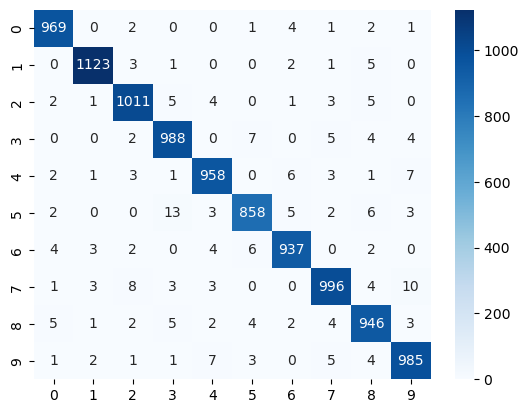

In [37]:
y_pred = ann.predict(X_test)
# Mengubah prediksi probabilitas ke label kelas
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi
y_true_classes = np.argmax(y_test, axis=1)  # Mengambil kelas sebenarnya

# Menghitung confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Menampilkan accuracy
test_loss, test_acc = ann.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
accuracy = np.sum(y_true_classes == y_pred_classes) / y_true_classes.shape[0]